In [37]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.layers import BatchNormalization 

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [5]:
test = pd.read_csv('data/Test.csv')
train = pd.read_csv('data/Train.csv')
meta = pd.read_csv('data/Meta.csv')

In [8]:
train.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [23]:
test_images = './data/' + test['Path']
train_images = './data/' + train['Path']
meta_images = './data/' + meta['Path']

In [10]:
train_labels=train.merge(meta,left_on="ClassId",right_on="ClassId")
test_labels=test.merge(meta,left_on="ClassId",right_on="ClassId")

In [24]:
X_train=[]
for i in range(len(train_images)):
    img=cv2.imread(train_images[i])
    if type(img)==np.ndarray:
        img_resized=cv2.resize(img,(40,40))
        X_train.append(img_resized)
y_train=train_labels["ClassId"]

In [25]:
X_test=[]
for i in range(len(test_images)):
    img=cv2.imread(test_images[i])
    if type(img)==np.ndarray:
        img_resized=cv2.resize(img,(40,40))
        X_test.append(img_resized)
y_test=test_labels["ClassId"]

In [26]:
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)

In [27]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((39209, 40, 40, 3), (39209,), (12630, 40, 40, 3), (12630,))

In [28]:
X_train=X_train/255.0 
X_test=X_test/255.0 

In [29]:
model=Sequential() 

model.add(Conv2D(filters=8,kernel_size=(3,3),activation="relu",input_shape=(40,40,3)))
model.add(Conv2D(filters=12,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=40,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=.2))
model.add(Dense(64,activation="relu"))
model.add(Flatten())
model.add(Dense(43,activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",metrics="accuracy")

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 38, 38, 8)         224       
                                                                 
 conv2d_4 (Conv2D)           (None, 36, 36, 12)        876       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 12)       0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 18, 18, 12)       48        
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 40)        4360      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 40)        

In [31]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=5,epochs=3) 

Epoch 1/3
7842/7842 [==============================] - 86s 11ms/step - loss: 0.3447 - accuracy: 0.9049 - val_loss: 18.0054 - val_accuracy: 0.0362
Epoch 2/3
7842/7842 [==============================] - 106s 13ms/step - loss: 0.0805 - accuracy: 0.9765 - val_loss: 28.7247 - val_accuracy: 0.0358
Epoch 3/3
7842/7842 [==============================] - 117s 15ms/step - loss: 0.0582 - accuracy: 0.9829 - val_loss: 28.1366 - val_accuracy: 0.0366


In [33]:
_,accuracy=model.evaluate(X_test,y_test) 
print("Accuracy = %.2f%% " % (accuracy*100))

395/395 [==============================] - 3s 8ms/step - loss: 28.1366 - accuracy: 0.0366
Accuracy = 3.66% 


In [40]:
model.save('traffic_sign_recognition.h5')

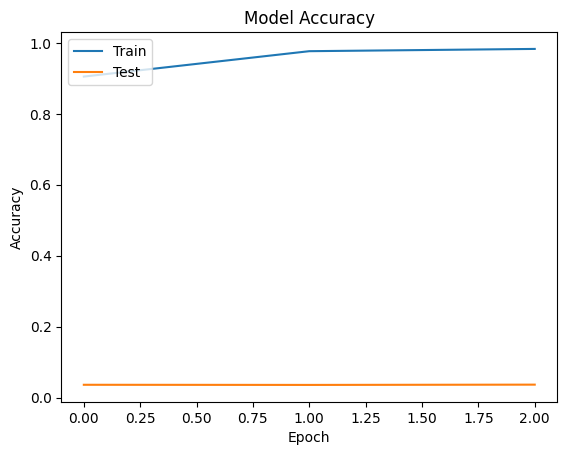

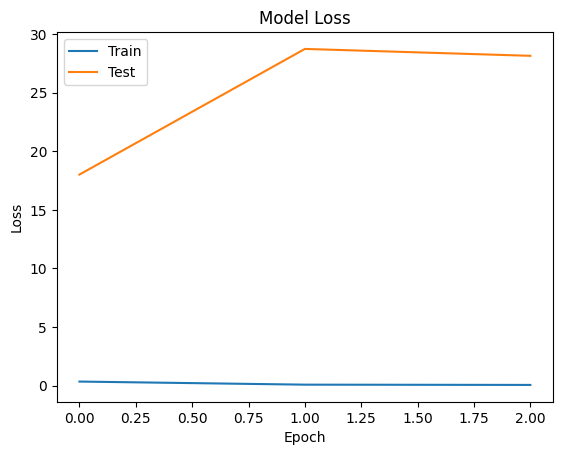

In [35]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train","Test"],loc="upper left")
plt.show()